### LinearRegression

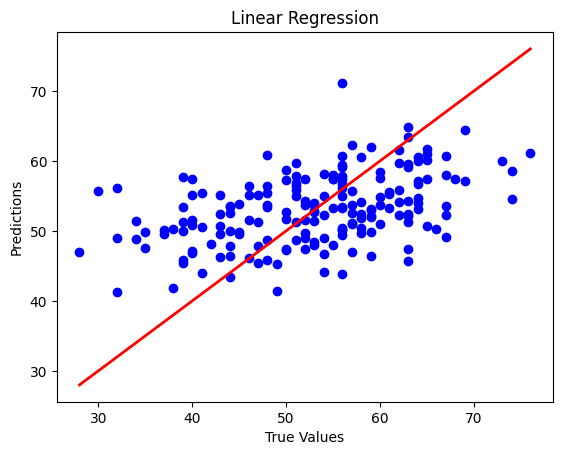

Mean Squared Error: 75.43645077671908
R-squared: 0.19490392899434827


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Загружаем данные
df = pd.read_csv('heart.csv')

# Обрабатываем категориальные переменные (например, ChestPainType)
categorical_columns = ['ChestPainType', 'Sex', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Разделяем на признаки и целевую переменную
X = df.drop('Age', axis=1)  # Для примера используем 'Age' как целевую переменную
y = df['Age']

# Создаём пайплайн
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_columns),
            ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns)
        ])),
    ('regressor', LinearRegression())
])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучаем модель
pipeline.fit(X_train, y_train)

# Прогнозируем на тестовых данных
y_pred = pipeline.predict(X_test)

# Визуализируем результаты
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression')
plt.show()

# Вычисляем метрики
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


## OLS

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Загружаем данные
df = pd.read_csv('./heart.csv')

# Обрабатываем категориальные переменные (например, ChestPainType)
categorical_columns = ['ChestPainType', 'Sex', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Разделяем на признаки и целевую переменную
X = df.drop('Age', axis=1)  # Для примера используем 'Age' как целевую переменную
y = df['Age']

# Создаём пайплайн
pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_columns),
            ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns)
        ])),
])

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применяем пайплайн для обработки данных
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

# Добавляем константу
X_train_const = sm.add_constant(X_train_transformed)

# Строим модель OLS
model = sm.OLS(y_train, X_train_const)
results = model.fit()

# Выводим результаты
print(results.summary())
print("Параметры модели: ", results.params)
print("R^2: ", results.rsquared)


                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     21.02
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           1.89e-47
Time:                        08:07:06   Log-Likelihood:                -2549.3
No. Observations:                 734   AIC:                             5131.
Df Residuals:                     718   BIC:                             5204.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.1246      1.528     38.046      0.0

In [8]:
# Применяем пайплайн для обработки тестовых данных
X_test_transformed = pipeline.transform(X_test)

# Добавляем константу для тестовой выборки
X_test_const = sm.add_constant(X_test_transformed)

# Предсказания с использованием обученной модели
y_pred = results.predict(X_test_const)

# Выводим предсказания
print('Прогнозы:', y_pred, sep='\n')

Прогнозы:
[45.66970951 52.71440342 61.05849995 57.35342586 44.19021875 49.11618727
 50.09122372 57.17461199 55.08742503 60.61921732 54.9655513  59.652705
 54.00351839 43.86346642 62.29835144 50.51785834 53.10139822 46.91944547
 49.95353108 52.30361944 60.67406633 53.75581286 46.86031899 50.42427728
 58.51658801 51.59783901 45.83787238 64.36516086 46.48319567 41.20804245
 47.43353673 47.13920543 63.3731242  55.1033614  71.11565184 50.19043529
 53.68207503 45.48825441 52.32073468 52.49024654 58.0515778  53.34862558
 61.17418418 52.80465547 58.36740692 55.77698278 49.94882048 56.69695811
 54.03828036 59.76474062 52.29043805 48.80877026 57.42679793 57.30986132
 55.41720349 55.2061021  52.06796356 57.15412279 52.47236303 53.53948399
 51.19895951 53.76381282 46.3412357  60.16908379 47.01798198 57.86080176
 61.6872329  52.40142487 60.5795682  53.78899828 50.91319801 48.6447397
 59.54834612 53.74473889 48.00612748 50.29734893 51.79844891 54.8097865
 51.44863485 58.72997596 50.74164823 56.15137

In [9]:
y_test.shape, y_pred.shape

((184,), (184,))

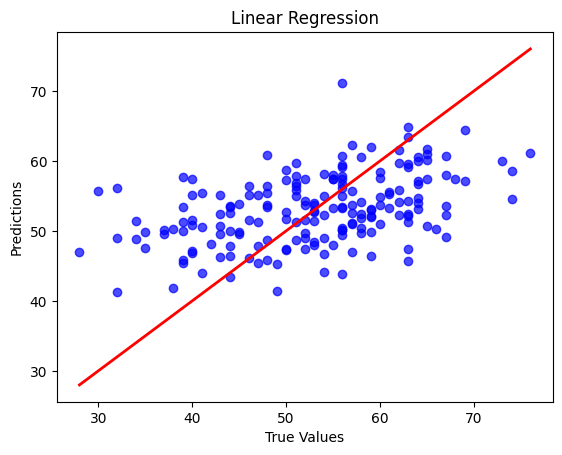

In [10]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression')
plt.show()


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (RВІ): {r2:.4f}')


Mean Squared Error (MSE): 75.4365
R-squared (RВІ): 0.1949
